# Logs

In [54]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(menu_id="main_menu")

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt

## Load data

In [95]:
import pandas


def load_txt_file(filenames):
    if isinstance(filenames, str):
        filenames = [filenames]
    lines = []
    for filename in filenames:
        with open(filename, "r") as f:
            text = f.read()
        for t in text.split("\n"):
            if "{" not in t:
                continue
            r = eval(t)
            r["ort"] = "ort" in r["scenario"]
            r["experiment"] = "-".join(c for c in r["scenario"].split('-') if c != "ort")
            update = {}
            for k in r:
                if isinstance(k, tuple) and len(k) == 2:
                    update[f"params-{k[0]}-{k[1]}"] = r[k]
            r.update(update)
            lines.append(r)
    df = pandas.DataFrame(lines)
    return df

df = load_txt_file("../log/results.txt")
columns = [c for c in df.columns if "(" not in str(c)]
columns_ = [c for c in df.columns if "(" in str(c)]
df[columns].head(n=2)

,get_rank,memory_cpu_percent,gpu_used_gb,local_rank,scenario,N,train_batch_size,time_per_img,time_per_iter,times,program,ort,experiment,params-torch.float32-cuda:0,params-torch.float16-cuda:0
0,-1,3.5,5.395508,0,torch,100,8,0.054545,5.454493,"[5.536627488996601, 5.366112298972439, 5.46073...",perf.py,False,torch,124443653.0,NaN
1,-1,3.6,5.081055,0,ort-torch,100,8,0.042129,4.212895,"[4.213729045994114, 4.206773214013083, 4.21818...",perf.py,True,torch,124443653.0,NaN


In [96]:
df[columns_].head().T

C:\Python3105_x64\lib\site-packages\pandas\core\common.py:245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


,0,1,2,3,4
"(torch.float32, cuda:0)",124443653.0,124443653.0,124443653.0,124443653.0,NaN
"(GPT2Loss, torch.float32, cuda:0)",124443653.0,124443653.0,124443653.0,124443653.0,NaN
"(GPT2Model, torch.float32, cuda:0)",124439808.0,124439808.0,124439808.0,124439808.0,NaN
"(Embedding, torch.float32, cuda:0)",39383808.0,39383808.0,39383808.0,39383808.0,NaN
"(ModuleList, torch.float32, cuda:0)",85054464.0,85054464.0,85054464.0,85054464.0,NaN
"(GPT2Block, torch.float32, cuda:0)",85054464.0,85054464.0,85054464.0,85054464.0,NaN
"(LayerNorm, torch.float32, cuda:0)",38400.0,38400.0,38400.0,38400.0,NaN
"(GPT2Attention, torch.float32, cuda:0)",28348416.0,28348416.0,28348416.0,28348416.0,NaN
"(Conv1D, torch.float32, cuda:0)",85017600.0,85017600.0,85017600.0,85017600.0,NaN
"(GPT2MLP, torch.float32, cuda:0)",56669184.0,56669184.0,56669184.0,56669184.0,NaN


## results.txt

In [97]:
sel = df[["experiment", "ort", "time_per_img"]]
sel.sort_values(by=["experiment", "ort"])

,experiment,ort,time_per_img
2,ds0,False,0.057725
3,ds0,True,0.047683
4,ds0-f16,False,0.065349
5,ds0-f16,True,0.042806
6,ds1,False,0.088916
19,ds1,True,0.079066
7,ds1-f16,False,0.081045
9,ds1-f16,True,0.062580
8,ds1-f16-offload,False,0.260305
10,ds1-f16-offload,True,0.235234


### Time per image

In [98]:
piv = sel.pivot(index="experiment", columns="ort", values="time_per_img")
piv = piv.sort_values(by=False)
piv["ort/torch-ds"] = piv[True] / piv[False]
piv

ort,False,True,ort/torch-ds
experiment,,,
torch,0.054545,0.042129,0.772371
ds0,0.057725,0.047683,0.826036
ds0-f16,0.065349,0.042806,0.655033
ds1-f16,0.081045,0.062580,0.772169
ds1,0.088916,0.079066,0.889215
ds1-f16-offload,0.260305,0.235234,0.903688
ds2,0.268284,0.269338,1.003929
ds2-offload,0.270898,0.259999,0.959765
ds2-f16,0.272929,0.240881,0.882580


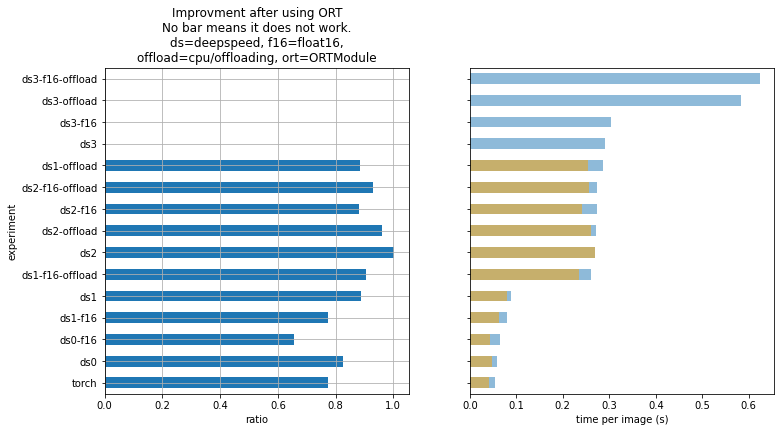

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
piv["ort/torch-ds"].plot(
    kind="barh", grid=True, ax=ax[0],
    title="Improvment after using ORT\nNo bar means it does not work."
          "\nds=deepspeed, f16=float16,\noffload=cpu/offloading, ort=ORTModule")
piv[False].plot(ax=ax[1], kind="barh", alpha=0.5)
piv[True].plot(ax=ax[1], kind="barh", color="orange", alpha=0.5)
ax[0].set_xlabel("ratio")
ax[1].set_xlabel("time per image (s)");

### Other metrics

In [61]:
piv = df.pivot(index="experiment", columns="ort", values="memory_cpu_percent")
piv = piv.sort_index()
piv["ort/torch-ds"] = piv[True] / piv[False]
piv

ort,False,True,ort/torch-ds
experiment,,,
ds0,3.5,3.6,1.028571
ds0-f16,3.5,3.6,1.028571
ds1,3.5,4.9,1.400000
ds1-f16,3.5,3.7,1.057143
ds1-f16-offload,4.2,4.4,1.047619
ds1-offload,6.2,6.3,1.016129
ds2,4.4,6.0,1.363636
ds2-f16,4.3,5.4,1.255814
ds2-f16-offload,4.4,4.4,1.000000


In [62]:
piv = df.pivot(index="experiment", columns="ort", values="gpu_used_gb")
piv = piv.sort_index()
piv["ort/torch-ds"] = piv[True] / piv[False]
piv

ort,False,True,ort/torch-ds
experiment,,,
ds0,5.508789,5.008789,0.909236
ds0-f16,4.723633,4.493164,0.951209
ds1,6.211914,6.434570,1.035843
ds1-f16,4.475586,4.795898,1.071569
ds1-f16-offload,3.157227,3.079102,0.975255
ds1-offload,6.228516,5.992188,0.962057
ds2,6.446289,7.486328,1.161339
ds2-f16,3.922852,3.827148,0.975604
ds2-f16-offload,3.922852,3.827148,0.975604


### Parameters size

The figures for DeepSpeed stage 3 are interesting. It comes from the following code which aggregates the number of parameters per dtype and device. This sum is almost zero with deepspeed stage 3. Parameter size are null.

```python
params = list(model.parameters())
for p in params:
    key = str(p.dtype), str(p.device)
    if key not in kinds:
        stats[key] = 0
    stats[key] += np.prod(tuple(p.shape))
```

In [63]:
piv = df.pivot(index="experiment", columns="ort", values="params-torch.float32-cuda:0")
piv = piv.sort_index()
piv["ort/torch-ds"] = piv[True] / piv[False]
piv

ort,False,True,ort/torch-ds
experiment,,,
ds0,124443653.0,124443653.0,1.0
ds0-f16,NaN,NaN,NaN
ds1,124443653.0,124443653.0,1.0
ds1-f16,NaN,NaN,NaN
ds1-f16-offload,NaN,NaN,NaN
ds1-offload,124443653.0,124443653.0,1.0
ds2,124443653.0,124443653.0,1.0
ds2-f16,NaN,NaN,NaN
ds2-f16-offload,NaN,NaN,NaN


In [64]:
piv = df.pivot(index="experiment", columns="ort", values="params-torch.float16-cuda:0")
piv = piv.sort_index()
piv["ort/torch-ds"] = piv[True] / piv[False]
piv

ort,False,True,ort/torch-ds
experiment,,,
ds0,NaN,NaN,NaN
ds0-f16,124443653.0,124443653.0,1.0
ds1,NaN,NaN,NaN
ds1-f16,124443653.0,124443653.0,1.0
ds1-f16-offload,124443653.0,124443653.0,1.0
ds1-offload,NaN,NaN,NaN
ds2,NaN,NaN,NaN
ds2-f16,124443653.0,124443653.0,1.0
ds2-f16-offload,124443653.0,124443653.0,1.0


## log-distri.txt - distributed

In [74]:
dfl = load_txt_file([f"../log/log-distri-{i}.txt" for i in range(4)])
dfl_large = load_txt_file([f"../log/log-distri-gpt2-large-{i}.txt" for i in range(4)])
dfl.shape, dfl_large.shape

((96, 115), (40, 63))

In [69]:
columns = [c for c in dfl.columns if "(" not in str(c)]
columns_ = [c for c in dfl.columns if "(" in str(c)]
dfl[columns].head(n=2)

,WORLD_SIZE,N,time,time_per_img,get_rank,memory_cpu_percent,gpu_used_gb,local_rank,scenario,ort,experiment,params-torch.float32-cuda:0,params-torch.float16-cuda:0,params-torch.float32-cuda:1,params-torch.float16-cuda:1,params-torch.float32-cuda:2,params-torch.float16-cuda:2,params-torch.float32-cuda:3,params-torch.float16-cuda:3
0,4,48,11.444505,0.238427,0,6.7,4.501953,0,ds0,False,ds0,124443653.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,48,12.014401,0.250300,0,6.8,5.205078,0,ds1,False,ds1,124443653.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Time per image on one GPU

Two models:

* gpt2: 500 Mb (499.053.592 b)
* gpt2-large: 3 Gb (3.014.423 Kb)

In [116]:
piv = dfl[dfl.local_rank == 0].pivot_table(index="experiment", columns="ort", values="time_per_img")
piv = piv.sort_values(by=False)
piv["ort/torch-ds"] = piv[True] / piv[False]
piv

ort,False,True,ort/torch-ds
experiment,,,
ds0-f16,0.148090,0.321564,2.171405
ds1-f16,0.161931,0.326948,2.019058
ds1-f16-offload,0.202553,0.364649,1.800265
ds2-f16,0.209348,0.363147,1.734661
ds2-f16-offload,0.211223,0.367896,1.741743
ds0,0.238427,0.422449,1.771815
ds1,0.250300,0.352149,1.406908
ds1-offload,0.325156,0.505654,1.555111
ds2,0.334518,0.498357,1.489774


In [117]:
piv_large = dfl_large[dfl_large.local_rank == 1].pivot_table(index="experiment", columns="ort", values="time_per_img")
piv_large = piv_large.sort_values(by=False)
piv_large["ort/torch-ds"] = piv_large[True] / piv_large[False]
piv_large

ort,False,True,ort/torch-ds
experiment,,,
ds1-f16,0.659242,0.591562,0.897336
ds1-f16-offload,1.221580,1.134309,0.928559
ds2-f16,1.226368,1.079687,0.880394
ds2-f16-offload,1.251120,1.098546,0.878050
ds3-f16,1.783838,NaN,NaN
ds3-f16-offload,2.571631,NaN,NaN


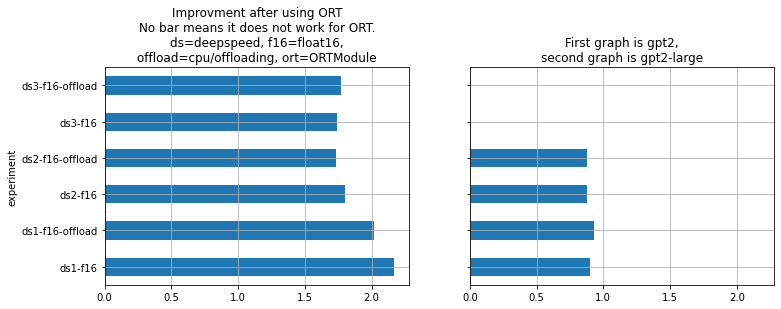

In [118]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=True)
piv["ort/torch-ds"].plot(
    kind="barh", grid=True, ax=ax[0],
    title="Improvment after using ORT\nNo bar means it does not work for ORT."
          "\nds=deepspeed, f16=float16,\noffload=cpu/offloading, ort=ORTModule")
piv_large["ort/torch-ds"].plot(
    kind="barh", grid=True, ax=ax[1],
    title="First graph is gpt2,\nsecond graph is gpt2-large");

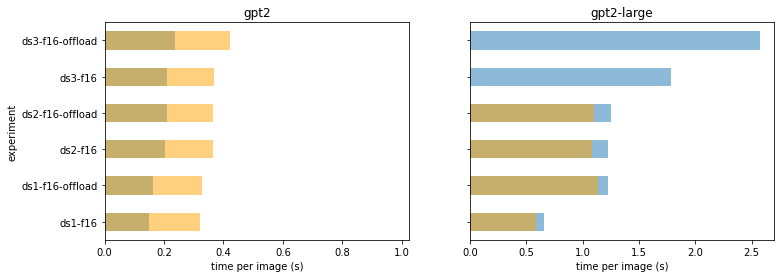

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
piv[False].plot(ax=ax[0], kind="barh", alpha=0.5, title="gpt2")
piv[True].plot(ax=ax[0], kind="barh", color="orange", alpha=0.5)
piv_large[False].plot(ax=ax[1], kind="barh", alpha=0.5, title="gpt2-large")
piv_large[True].plot(ax=ax[1], kind="barh", color="orange", alpha=0.5)
ax[0].set_xlabel("time per image (s)")
ax[1].set_xlabel("time per image (s)");

### Other metrics

#### memory_cpu_percent

In [127]:
piv = pandas.pivot_table(dfl, index="experiment", columns="ort", values="memory_cpu_percent")
piv = piv.sort_index()
piv["ort/torch-ds"] = piv[True] / piv[False]
piv

ort,False,True,ort/torch-ds
experiment,,,
ds0,6.7,7.0,1.044776
ds0-f16,6.7,7.1,1.059701
ds1,6.8,7.1,1.044118
ds1-f16,6.8,7.1,1.044118
ds1-f16-offload,8.4,8.6,1.023810
ds1-offload,8.6,8.8,1.023256
ds2,8.7,8.8,1.011494
ds2-f16,8.4,8.6,1.023810
ds2-f16-offload,8.4,8.6,1.023810


In [128]:
piv = pandas.pivot_table(dfl_large, index="experiment", columns="ort", values="memory_cpu_percent")
piv = piv.sort_index()
piv["ort/torch-ds"] = piv[True] / piv[False]
piv

ort,False,True,ort/torch-ds
experiment,,,
ds1-f16,6.9,7.8,1.130435
ds1-f16-offload,12.0,11.8,0.983333
ds2-f16,12.0,11.8,0.983333
ds2-f16-offload,12.0,11.8,0.983333
ds3-f16,6.9,NaN,NaN
ds3-f16-offload,12.2,NaN,NaN


#### gpu_used_gb

In [131]:
piv = pandas.pivot_table(dfl, index="experiment", columns="ort", values="gpu_used_gb")
piv = piv.sort_index()
piv["ort/torch-ds"] = piv[True] / piv[False]
piv

ort,False,True,ort/torch-ds
experiment,,,
ds0,3.774658,3.798096,1.006209
ds0-f16,4.159424,3.856689,0.927217
ds1,4.536377,4.134033,0.911307
ds1-f16,2.821533,2.872314,1.017998
ds1-f16-offload,2.725830,2.641846,0.969189
ds1-offload,4.361572,4.093994,0.938651
ds2,5.097412,4.861084,0.953638
ds2-f16,3.135498,3.044189,0.970879
ds2-f16-offload,3.135498,3.044678,0.971035


In [132]:
piv = pandas.pivot_table(dfl_large, index="experiment", columns="ort", values="gpu_used_gb")
piv = piv.sort_index()
piv["ort/torch-ds"] = piv[True] / piv[False]
piv

ort,False,True,ort/torch-ds
experiment,,,
ds1-f16,8.505615,7.842529,0.922041
ds1-f16-offload,6.374756,5.503662,0.863353
ds2-f16,6.814209,5.934326,0.870875
ds2-f16-offload,6.813721,5.934326,0.870938
ds3-f16,8.093506,NaN,NaN
ds3-f16-offload,5.407471,NaN,NaN


#### params-torch.float32-cuda:0

In [133]:
piv = pandas.pivot_table(dfl, index="experiment", columns="ort", values="params-torch.float32-cuda:0")
piv = piv.sort_index()
piv["ort/torch-ds"] = piv[True] / piv[False]
piv

ort,False,True,ort/torch-ds
experiment,,,
ds0,124443653.0,124443653.0,1.0
ds1,124443653.0,124443653.0,1.0
ds1-offload,124443653.0,124443653.0,1.0
ds2,124443653.0,124443653.0,1.0
ds2-offload,124443653.0,124443653.0,1.0
ds3,125189.0,NaN,NaN
ds3-offload,125189.0,NaN,NaN


In [136]:
piv = pandas.pivot_table(dfl, index="experiment", columns="ort", values="params-torch.float16-cuda:0")
piv = piv.sort_index()
piv["ort/torch-ds"] = piv[True] / piv[False]
piv

ort,False,True,ort/torch-ds
experiment,,,
ds0-f16,124443653.0,124443653.0,1.0
ds1-f16,124443653.0,124443653.0,1.0
ds1-f16-offload,124443653.0,124443653.0,1.0
ds2-f16,124443653.0,124443653.0,1.0
ds2-f16-offload,124443653.0,124443653.0,1.0
ds3-f16,0.0,NaN,NaN
ds3-f16-offload,0.0,NaN,NaN


In [135]:
piv = pandas.pivot_table(dfl_large, index="experiment", columns="ort", values="params-torch.float16-cuda:0")
piv = piv.sort_index()
piv["ort/torch-ds"] = piv[True] / piv[False]
piv

ort,False,True,ort/torch-ds
experiment,,,
ds1-f16,774036485.0,774036485.0,1.0
ds1-f16-offload,774036485.0,774036485.0,1.0
ds2-f16,774036485.0,774036485.0,1.0
ds2-f16-offload,774036485.0,774036485.0,1.0
ds3-f16,0.0,NaN,NaN
ds3-f16-offload,0.0,NaN,NaN
